### Do your imports!

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [2]:
df = pd.read_csv('subset.csv', nrows = 10000000)

/Users/tanazmeghjani/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'address_type', 'city', 'status', 'borough',
       'open_data_channel_type'],
      dtype='object')

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 15 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   unique_key              int64 
 1   created_date            object
 2   closed_date             object
 3   agency                  object
 4   agency_name             object
 5   complaint_type          object
 6   descriptor              object
 7   location_type           object
 8   incident_zip            object
 9   incident_address        object
 10  address_type            object
 11  city                    object
 12  status                  object
 13  borough                 object
 14  open_data_channel_type  object
dtypes: int64(1), object(14)
memory usage: 1.1+ GB


## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [8]:
df.created_date = pd.to_datetime(df.created_date, errors='coerce', format= "%m/%d/%Y %I:%M:%S %p")

In [9]:
df.created_date.head()

0   2019-01-27 19:26:21
1   2019-01-29 11:06:56
2   2019-02-13 12:28:18
3   2019-02-13 15:40:19
4   2019-02-13 13:18:31
Name: created_date, dtype: datetime64[ns]

In [10]:
df.closed_date = pd.to_datetime(df.closed_date, errors='coerce', format= "%m/%d/%Y %I:%M:%S %p")

In [11]:
df.closed_date.head()

0   2019-02-13 10:53:25
1   2019-02-13 02:07:22
2   2019-03-15 09:54:50
3   2019-02-20 06:18:35
4   2019-02-20 05:36:54
Name: closed_date, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_key              int64         
 1   created_date            datetime64[ns]
 2   closed_date             datetime64[ns]
 3   agency                  object        
 4   agency_name             object        
 5   complaint_type          object        
 6   descriptor              object        
 7   location_type           object        
 8   incident_zip            object        
 9   incident_address        object        
 10  address_type            object        
 11  city                    object        
 12  status                  object        
 13  borough                 object        
 14  open_data_channel_type  object        
dtypes: datetime64[ns](2), int64(1), object(12)
memory usage: 1.1+ GB


## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [13]:
df.created_date.dt.month.value_counts()

6     989313
5     940502
3     924945
1     899853
4     870642
8     825969
7     806911
11    805745
2     796204
10    794342
12    685686
9     659888
Name: created_date, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [14]:
df.resample('M', on='created_date').size().sort_values(ascending=False)

created_date
2021-06-30    239268
2021-05-31    232538
2019-05-31    227253
2019-06-30    212518
2019-03-31    210501
               ...  
2014-10-31      5860
2014-07-31      4591
2014-09-30      4299
2014-06-30      4262
2014-08-31      4005
Length: 143, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

/var/folders/m2/hbrfwp7911s5ykfcv0bl3bcc0000gn/T/ipykernel_2200/3562466300.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.created_date.dt.week.value_counts().sort_index().plot(ylim=(0,300000))


<AxesSubplot:>

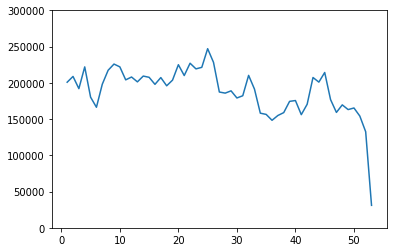

In [18]:
df.created_date.dt.week.value_counts().sort_index().plot(ylim=(0,300000))

## What time of day (by hour) is the least common for 311 complains? The most common?


In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

In [ ]:
# wrong
# df.resample('H', on='created_date').size().sort_values()

In [19]:
#most and least common
df.created_date.dt.hour.value_counts()

0     2874274
12     660998
10     504425
11     494566
14     473185
9      471728
13     445568
15     428815
16     382487
22     338162
8      334402
21     320998
17     309940
23     303364
19     299770
18     293715
20     290782
7      205420
1      160956
2      108008
6      106439
3       71622
5       62619
4       57757
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:>

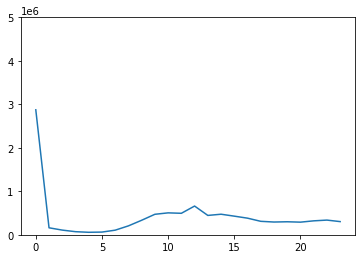

In [21]:
df.created_date.dt.hour.value_counts().sort_index().plot(ylim=(0,5000000))

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [22]:
df.agency.value_counts().head(5)

HPD     3502371
NYPD    2374479
DOT     1095864
DSNY     980011
DOB      589089
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [23]:
df.agency_name.value_counts().head(6)
#NYPD = New York Police Department
#HPD = Department of Housing Preservation and Development
#DOT = Department of Transportation
#DSNY = Department of Sanitation
#DEP = Department of Environmental Protection

Department of Housing Preservation and Development    3502132
New York City Police Department                       2374022
Department of Transportation                          1095860
Department of Buildings                                589068
Department of Environmental Protection                 421716
Department of Sanitation                               421528
Name: agency_name, dtype: int64

## What is the most common complaint to HPD?

In [ ]:
# Why did you pick these columns to calculate the answer?

In [24]:
df[df.agency == 'HPD'].complaint_type.value_counts()

HEATING                   876726
GENERAL CONSTRUCTION      499072
PLUMBING                  486525
HEAT/HOT WATER            368278
PAINT - PLASTER           359975
NONCONST                  257766
ELECTRIC                  185921
UNSANITARY CONDITION      118670
PAINT/PLASTER              69504
APPLIANCE                  63487
WATER LEAK                 48094
DOOR/WINDOW                47438
GENERAL                    41142
FLOORING/STAIRS            27954
HPD Literature Request     27266
SAFETY                     13003
CONSTRUCTION                4999
ELEVATOR                    2397
Unsanitary Condition        2124
OUTSIDE BUILDING            1328
General                      493
Safety                       180
STRUCTURAL                    16
Plumbing                       6
Outside Building               3
Appliance                      2
VACANT APARTMENT               1
AGENCY                         1
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [25]:
df.groupby('agency')['complaint_type'].value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3) \
    .to_frame(name='counts') \
    .reset_index()

,agency,complaint_type,counts
0,3-1-1,Noise Survey,56
1,3-1-1,OEM Disabled Vehicle,5
2,3-1-1,Benefit Card Replacement,2
3,ACS,Forms,135
4,ACS,Damaged Tree,1
...,...,...,...
63,TAX,Question,80
64,TAX,Comments,7
65,TLC,For Hire Vehicle Complaint,22153
66,TLC,Taxi Complaint,15782


## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [ ]:
# Why did you pick these columns to calculate the answer?

In [26]:
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'address_type', 'city', 'status', 'borough',
       'open_data_channel_type'],
      dtype='object')

In [27]:
df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'].descriptor.value_counts()

/var/folders/m2/hbrfwp7911s5ykfcv0bl3bcc0000gn/T/ipykernel_2200/2781222364.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'].descriptor.value_counts()


Loud Music/Party    492411
Banging/Pounding    164758
Loud Talking         39607
Loud Television      10050
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

/var/folders/m2/hbrfwp7911s5ykfcv0bl3bcc0000gn/T/ipykernel_2200/3611966356.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'][df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts().sort_index().plot()


<AxesSubplot:>

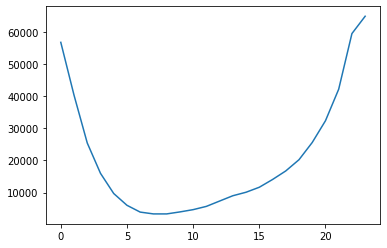

In [28]:
df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'][df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts().sort_index().plot()

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

In [ ]:
# there are two big techniques for date stuff: .dt or .resample
# if you use one of those, explain why you picked that one and not the other

/var/folders/m2/hbrfwp7911s5ykfcv0bl3bcc0000gn/T/ipykernel_2200/705262241.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'][df.descriptor == 'Loud Music/Party'].created_date.dt.month.value_counts().sort_index().plot()


<AxesSubplot:>

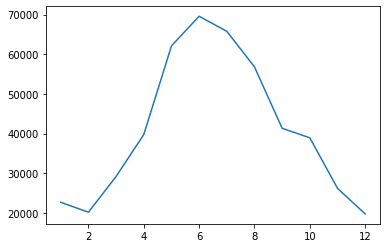

In [29]:
df[df.agency == 'NYPD'][df.complaint_type == 'Noise - Residential'][df.descriptor == 'Loud Music/Party'].created_date.dt.month.value_counts().sort_index().plot()

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [30]:
df[df.complaint_type.str.contains('Bee', na=False)]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942274,43389401,2019-07-26 11:08:29,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10310.0,104 ELIZABETH STREET,NaN,STATEN ISLAND,In Progress,STATEN ISLAND,PHONE
9959523,46376328,2020-06-03 20:32:14,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11434.0,137-18 160 STREET,NaN,JAMAICA,In Progress,QUEENS,PHONE
9993700,51340804,2021-07-26 10:01:15,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10314.0,342 GANSEVOORT BOULEVARD,NaN,STATEN ISLAND,In Progress,STATEN ISLAND,PHONE
9994578,51342433,2021-07-26 10:51:10,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,11214.0,21 BAY 14 STREET,NaN,BROOKLYN,In Progress,BROOKLYN,ONLINE


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:>

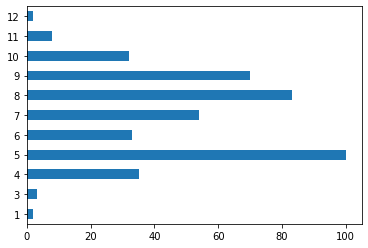

In [32]:
df[df.complaint_type.str.contains('Bee', na=False)].created_date.dt.month.value_counts().sort_index().plot(kind='barh')

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [33]:
df[df.complaint_type.str.contains('Bee', na=False)].descriptor.value_counts()

Bees/Wasps - Not a beekeper    359
Beekeeping - Honeybees          63
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [34]:
df['time_to_fix'] = df['closed_date']-df['created_date']

Save it as a new column called `time_to_fix`

In [35]:
df.time_to_fix.mean()

Timedelta('10 days 21:47:50.549424758')

In [36]:
df.time_to_fix.median()

Timedelta('1 days 23:07:15')

## Which agency has the best time-to-fix time?

In [38]:
df.groupby('agency')['time_to_fix'].median().sort_values()

agency
DOHMH                                             0 days 00:00:00
EDC                                               0 days 00:00:03
HRA                                               0 days 00:00:38
3-1-1                                             0 days 00:00:39
NYPD                                              0 days 00:55:54
MAYORâS OFFICE OF SPECIAL ENFORCEMENT    0 days 06:11:54.500000
DOT                                        0 days 19:53:23.500000
DEP                                               0 days 21:17:00
DORIS                                      1 days 00:04:02.500000
DHS                                               1 days 00:14:49
TLC                                               1 days 11:51:23
DCA                                               1 days 16:17:32
DSNY                                              1 days 16:21:00
DOF                                               2 days 04:57:07
DPR                                        2 days 21:59:49.500000
DOE

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [39]:
df.groupby('agency')['time_to_fix'].describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,65,0 days 00:00:56.984615384,0 days 00:01:17.965034692,0 days 00:00:03,0 days 00:00:17,0 days 00:00:39,0 days 00:00:58,0 days 00:07:44
ACS,1,0 days 22:48:06,NaT,0 days 22:48:06,0 days 22:48:06,0 days 22:48:06,0 days 22:48:06,0 days 22:48:06
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,60272,32 days 04:31:21.617367932,103 days 02:16:16.679270175,0 days 00:04:02,0 days 21:25:45,1 days 16:28:18,3 days 02:23:07.500000,804 days 21:18:42
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,416232,8 days 22:47:54.406532895,66 days 22:29:02.667316639,-1829 days +15:05:00,0 days 02:35:00,0 days 21:53:00,3 days 23:23:15,4033 days 23:51:00
DFTA,5244,9 days 10:19:09.692791762,22 days 16:47:45.060063388,0 days 00:01:30,2 days 14:57:11.500000,8 days 22:34:12,13 days 20:23:50.500000,1506 days 10:19:19
DHS,133609,3 days 19:55:59.929503252,11 days 08:08:49.044888541,0 days 00:00:04,0 days 02:01:07,1 days 00:20:02,5 days 00:29:20,586 days 12:35:49


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [40]:
df.groupby('agency').time_to_fix.agg(['median', 'size']).sort_values(by = 'median')

,median,size
agency,,
DOHMH,0 days 00:00:00,123966
EDC,0 days 00:00:03,21929
HRA,0 days 00:00:38,69512
3-1-1,0 days 00:00:39,67
NYPD,0 days 00:55:54,2374479
MAYORâS OFFICE OF SPECIAL ENFORCEMENT,0 days 06:11:54.500000,47392
DOT,0 days 19:53:23.500000,1095864
DEP,0 days 21:17:00,421716
DORIS,1 days 00:04:02.500000,58


In [41]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix         
                                                         median     size
agency                                                                  
3-1-1                                           0 days 00:00:39       67
ACS                                                         NaT      136
COIB                                                        NaT        4
DCA                                             1 days 16:17:32    60431
DCAS                                                        NaT      281
DCP                                                         NaT        9
DEP                                             0 days 21:17:00   421716
DFTA                                            8 days 22:28:24     5245
DHS                                             1 days 00:14:49   134062
DOB                                             9 days 04:16:32   589089
DOE                                             5 days 00:20:27     2406
DOF                                             2 days 04:57:07   242535
DOHMH                                           0 days 00:00:00   123966
DOITT                                   15 days 00:55:14.500000      696
DORIS                                    1 days 00:04:02.500000       58
DOT                                      0 days 19:53:23.500000  1095864
DPR                                      2 days 21:59:49.500000   269764
DSNY                                            1 days 16:21:00   980011
DVS                                                         NaT      120
EDC                                             0 days 00:00:03    21929
FDNY                                                        NaT       13
HPD                                             5 days 16:57:46  3502371
HRA                                             0 days 00:00:38    69512
MAYORâS OFFICE OF SPECIAL ENFORCEMENT  0 days 06:11:54.500000    47392
NYCEM                                          12 days 22:18:37     4267
NYPD                                            0 days 00:55:54  2374479
TAX                                                         NaT       87
TLC                                             1 days 11:51:23    53490

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [42]:
df[df.agency == 'NYPD'].groupby('complaint_type').time_to_fix.value_counts()

complaint_type     time_to_fix     
Abandoned Vehicle  0 days 00:15:35     23
                   0 days 00:16:19     22
                   0 days 00:17:43     22
                   0 days 00:37:06     22
                   0 days 00:05:09     21
                                       ..
Vending            5 days 17:12:51      1
                   6 days 04:42:47      1
                   8 days 18:40:45      1
                   13 days 20:58:19     1
                   18 days 00:56:51     1
Name: time_to_fix, Length: 405819, dtype: int64

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [44]:
pd.set_option("display.max_rows", 200)
df.groupby(['agency', 'borough']).time_to_fix.agg(['median', 'count']).sort_values(by = 'median')

median  \
agency                                  borough                                 
DOHMH                                   STATEN ISLAND         0 days 00:00:00   
                                        QUEENS                0 days 00:00:00   
                                        MANHATTAN             0 days 00:00:00   
                                        BROOKLYN              0 days 00:00:00   
                                        BRONX                 0 days 00:00:00   
DOB                                     Unspecified           0 days 00:00:00   
EDC                                     QUEENS                0 days 00:00:02   
                                        MANHATTAN             0 days 00:00:04   
3-1-1                                   Unspecified           0 days 00:00:17   
                                        MANHATTAN             0 days 00:00:36   
HRA                                     Unspecified           0 days 00:00:38   
3-1-1                                   QUEENS                0 days 00:00:42   
                                        STATEN ISLAND         0 days 00:00:51   
                                        BROOKLYN              0 days 00:00:52   
DEP                                     Unspecified           0 days 00:05:00   
NYPD                                    MANHATTAN             0 days 00:38:02   
                                        STATEN ISLAND         0 days 00:44:02   
                                        BROOKLYN              0 days 00:51:49   
                                        QUEENS                0 days 01:11:41   
                                        BRONX                 0 days 01:15:17   
DHS                                     MANHATTAN             0 days 02:11:33   
                                        Unspecified           0 days 03:06:14   
NYPD                                    Unspecified           0 days 04:33:00   
MAYORâS OFFICE OF SPECIAL ENFORCEMENT MANHATTAN             0 days 05:23:25   
                                        BRONX          0 days 05:34:18.500000   
DOT                                     BRONX          0 days 05:55:18.500000   
MAYORâS OFFICE OF SPECIAL ENFORCEMENT BROOKLYN       0 days 06:40:13.500000   
                                        QUEENS                0 days 13:23:38   
                                        Unspecified           0 days 15:28:30   
DEP                                     BROOKLYN              0 days 17:00:00   
                                        STATEN ISLAND         0 days 17:37:00   
TLC                                     MANHATTAN      0 days 17:41:41.500000   
DEP                                     BRONX                 0 days 17:54:00   
                                        QUEENS                0 days 18:15:00   
DOT                                     BROOKLYN              0 days 19:03:43   
TLC                                     BROOKLYN              0 days 19:07:18   
DOT                                     QUEENS                0 days 19:55:57   
DORIS                                   Unspecified    1 days 00:04:02.500000   
DOT                                     MANHATTAN             1 days 00:22:37   
                                        STATEN ISLAND         1 days 02:47:04   
DSNY                                    BRONX                 1 days 02:59:00   
DHS                                     QUEENS                1 days 03:51:57   
DCA                                     BRONX                 1 days 06:34:40   
MAYORâS OFFICE OF SPECIAL ENFORCEMENT STATEN ISLAND  1 days 09:32:46.500000   
DEP                                     MANHATTAN             1 days 09:49:00   
DHS                                     BROOKLYN              1 days 09:54:05   
DSNY                                    QUEENS                1 days 11:20:00   
DCA                                     BROOKLYN              1 days 14:19:33   
                     

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [ ]:
df.columns

In [45]:
df.pivot = df.pivot_table(
    columns='borough',
    index= 'agency',
    values='time_to_fix',
    aggfunc='median'
)

In [46]:
df.pivot

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
3-1-1,NaT,0 days 00:00:52,0 days 00:00:36,0 days 00:00:42,0 days 00:00:51,0 days 00:00:17
DCA,1 days 06:34:40,1 days 14:19:33,1 days 15:20:04,1 days 17:21:59,1 days 15:08:57,1 days 18:02:44
DEP,0 days 17:54:00,0 days 17:00:00,1 days 09:49:00,0 days 18:15:00,0 days 17:37:00,0 days 00:05:00
DFTA,10 days 22:33:43,5 days 14:38:31,8 days 06:12:54,9 days 01:46:46,8 days 23:57:35,13 days 00:22:26
DHS,3 days 02:49:00,1 days 09:54:05,0 days 02:11:33,1 days 03:51:57,3 days 04:10:10,0 days 03:06:14
DOB,16 days 12:43:51,6 days 13:33:27,6 days 10:12:06,13 days 12:34:43,9 days 09:42:25,0 days 00:00:00
DOE,7 days 01:21:52.500000,1 days 23:14:49,6 days 16:31:23,2 days 21:30:50,8 days 06:22:49,13 days 02:21:02
DOF,2 days 06:22:35,2 days 02:06:29,2 days 02:45:30,2 days 02:10:58,2 days 02:56:04,2 days 22:15:23.500000
DOHMH,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,NaT


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [47]:
df.pivot.sort_values(by = 'BRONX', ascending=False)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,18 days 18:46:18.500000,0 days 19:07:18,0 days 17:41:41.500000,2 days 16:14:56.500000,15 days 14:30:20,25 days 16:17:22.500000
DOB,16 days 12:43:51,6 days 13:33:27,6 days 10:12:06,13 days 12:34:43,9 days 09:42:25,0 days 00:00:00
DOITT,13 days 07:42:29,13 days 02:16:44,15 days 19:37:38.500000,12 days 22:41:25,12 days 22:00:06,16 days 02:29:10.500000
DFTA,10 days 22:33:43,5 days 14:38:31,8 days 06:12:54,9 days 01:46:46,8 days 23:57:35,13 days 00:22:26
DOE,7 days 01:21:52.500000,1 days 23:14:49,6 days 16:31:23,2 days 21:30:50,8 days 06:22:49,13 days 02:21:02
EDC,5 days 11:01:19,15 days 04:50:56.500000,0 days 00:00:04,0 days 00:00:02,10 days 22:47:34,315 days 12:49:17
HPD,5 days 00:00:00,5 days 00:00:00,5 days 17:53:52,6 days 22:27:25,7 days 00:00:00,6 days 00:00:00
DPR,3 days 04:52:42,3 days 03:52:18,3 days 00:36:24.500000,2 days 16:29:15,2 days 00:16:26,6 days 00:50:46
DHS,3 days 02:49:00,1 days 09:54:05,0 days 02:11:33,1 days 03:51:57,3 days 04:10:10,0 days 03:06:14


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [50]:
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')].complaint_type.value_counts().head()

Noise - Residential        766
Illegal Parking            324
Noise - Street/Sidewalk    218
Blocked Driveway           190
Noise - Vehicle            150
Name: complaint_type, dtype: int64

In [51]:
df[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')].complaint_type.value_counts().head()

Noise - Residential        438
Illegal Parking            334
HEAT/HOT WATER             282
Blocked Driveway           168
Noise - Street/Sidewalk    162
Name: complaint_type, dtype: int64

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [89]:
df[(df.created_date.dt.month > 11) & (df.created_date.dt.month <= 12) & (df.created_date.dt.day >= 25) & (df.created_date.dt.day < 26)].complaint_type.value_counts().head()

HEATING                3557
Noise - Residential    1580
HEAT/HOT WATER          912
Illegal Parking         602
Blocked Driveway        584
Name: complaint_type, dtype: int64

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [90]:
df[(df.created_date >= '2020-05-25') & (df.created_date < '2020-08-01')].complaint_type.value_counts().head()

Noise - Residential            75496
Noise - Street/Sidewalk        69831
Illegal Fireworks              41515
Illegal Parking                26266
Non-Emergency Police Matter    21842
Name: complaint_type, dtype: int64

In [91]:
df[(df.created_date >= '2019-05-25') & (df.created_date < '2019-08-01')].complaint_type.value_counts().head()

Noise - Residential                    38338
Illegal Parking                        31173
Noise - Street/Sidewalk                26931
Request Large Bulky Item Collection    23390
Blocked Driveway                       19600
Name: complaint_type, dtype: int64

In [92]:
df[(df.created_date >= '2018-05-25') & (df.created_date < '2018-08-01')].complaint_type.value_counts().head()

Derelict Vehicles                6808
Elevator                         2801
Graffiti                         2532
Homeless Person Assistance       2188
General Construction/Plumbing     960
Name: complaint_type, dtype: int64

In [99]:
df[df.complaint_type == 'Illegal Fireworks'].resample('M', on='created_date').size().sort_values(ascending=False)

created_date
2020-06-30    26068
2020-07-31    15376
2021-06-30     8893
2021-07-31     8853
2021-05-31     1327
2020-08-31      512
2021-08-31      420
2020-09-30      379
2021-04-30      194
2021-11-30      162
2019-07-31      131
2020-05-31      113
2020-11-30      107
2021-03-31       97
2021-01-31       91
2020-10-31       91
2019-06-30       78
2020-12-31       71
2021-10-31       69
2021-02-28       60
2019-08-31       40
2019-09-30       31
2019-10-31       30
2019-05-31       15
2020-04-30       13
2020-01-31        6
2019-12-31        4
2019-11-30        4
2015-07-31        4
2019-03-31        3
2019-04-30        3
2020-02-29        2
2017-07-31        2
2017-09-30        2
2020-03-31        1
2014-07-31        1
2017-06-30        1
2016-07-31        1
2016-06-30        1
2015-10-31        1
2016-09-30        0
2016-05-31        0
2016-04-30        0
2016-03-31        0
2016-02-29        0
2016-01-31        0
2015-12-31        0
2015-11-30        0
2015-09-30        0
2015-08

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)